# Задача
В ходе выполнения проекта необходимо решить задачу регрессии, обучив алгоритм предсказывать данные на существующем датасете.

# Описание данных

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

В качестве набора данных будем использовать датасет с прогноза поступления в университет (Admission_Predict)
Будем решать задачу регрессии. В качестве целевого признака возьмем колонку "Шанс поступления" (Chance of Admit)

In [45]:
data=pd.read_csv("Admission_Predict.csv")

In [46]:
data.shape

(400, 9)

In [47]:
data.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Отсутствующих данных нет

# Разведочный анализ

In [48]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [49]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [50]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


Проверим корреляцию между признаками

# Корреляционный анализ, выбор подходящих признаков

In [52]:
corr = data.corr()

In [53]:
corr

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


Построим тепловую карту корреляции для более наглядного представления

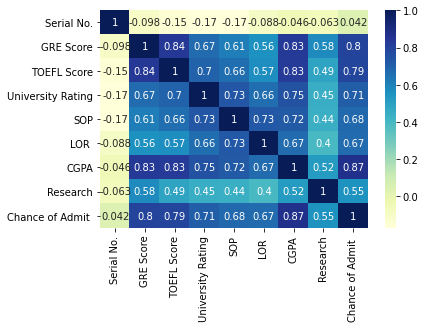

In [54]:
sns.heatmap(corr, cmap="YlGnBu", annot=True)

Построим графики, чтобы понять структуру данных

In [55]:
data = data.drop(['Serial No.'], axis=1)

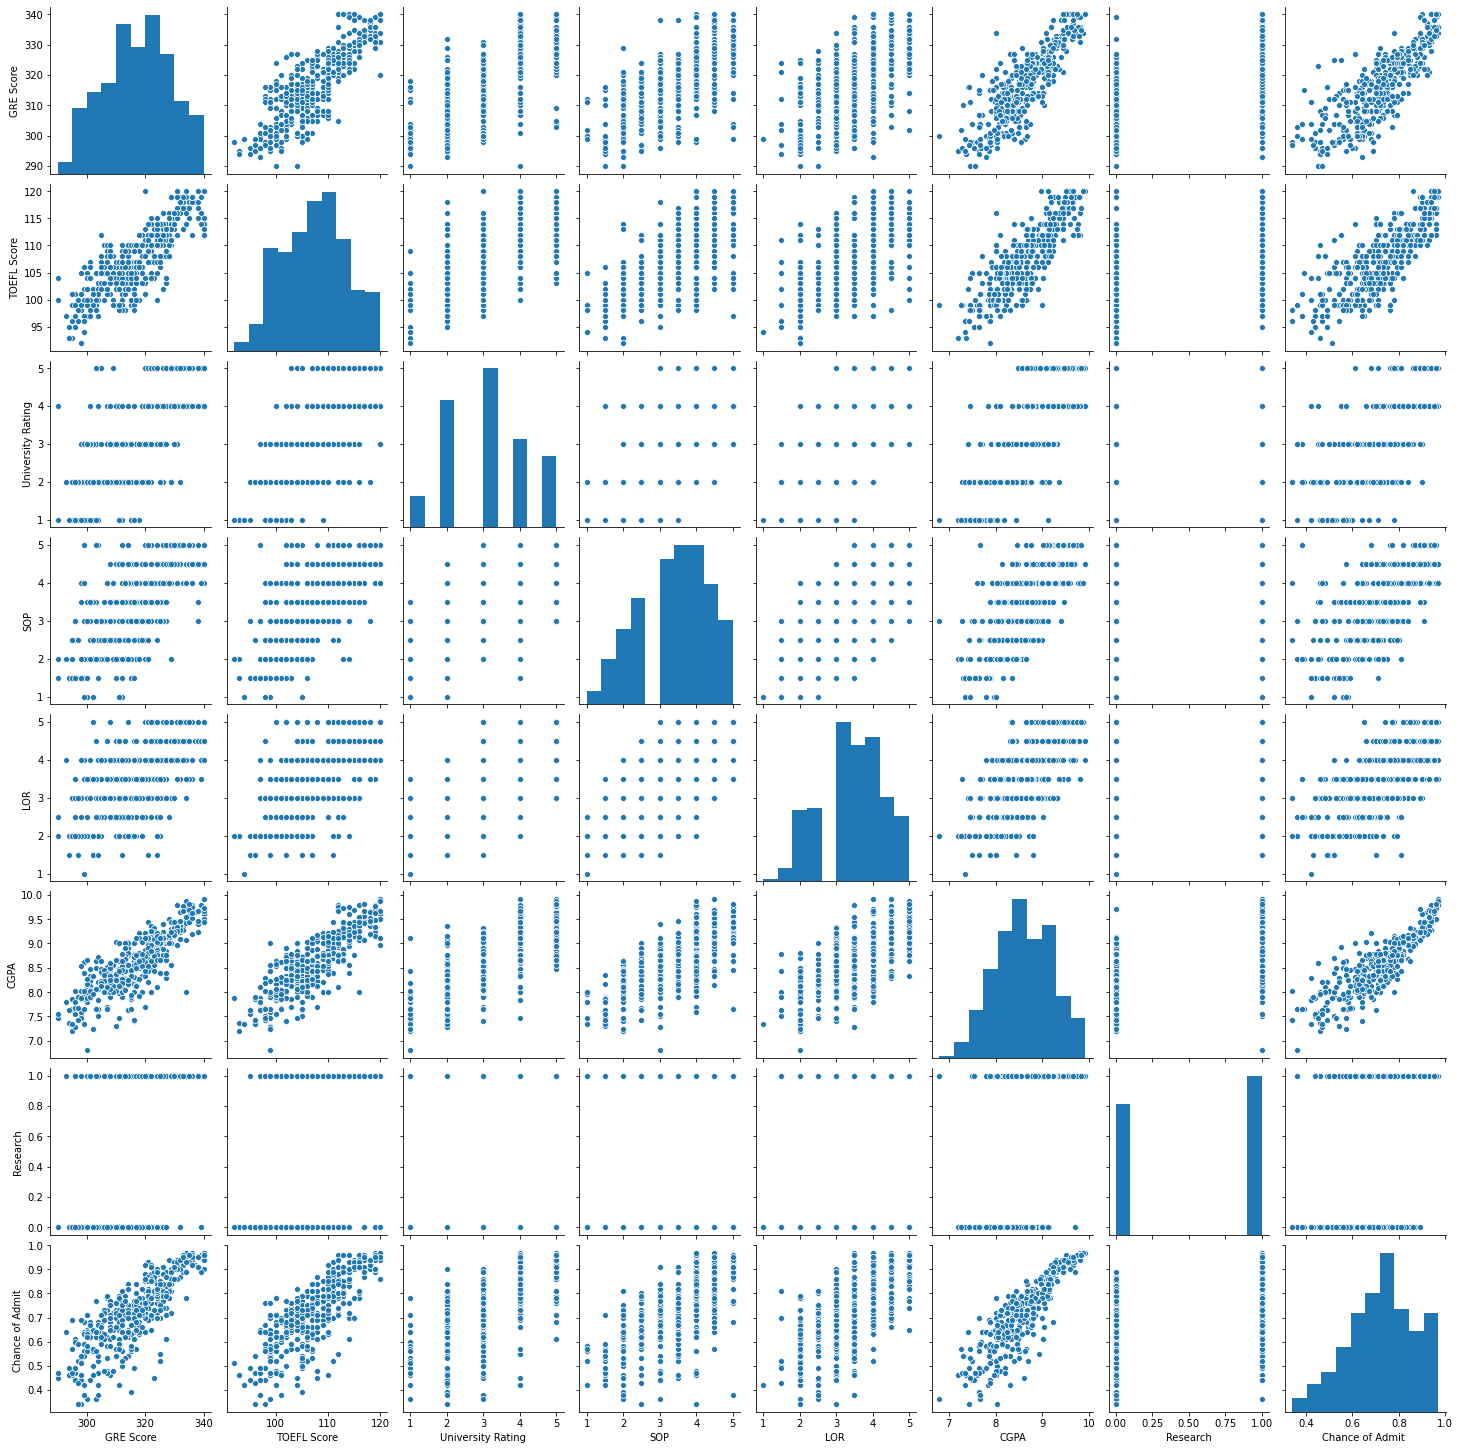

In [56]:
sns.pairplot(data)

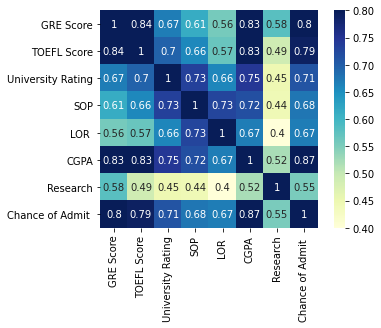

In [57]:
corr = data.corr()
sns.heatmap(corr, square=True, vmin=0.4, vmax=0.8,cmap="YlGnBu",annot=True)

Мы можем решать задачу регрессии, пытаясь предсказать шанс (%) поступления

Выделим целевой признак и нормализуем данные

In [58]:
target = data['Chance of Admit ']
data = data.drop(['Chance of Admit '], axis=1)

In [59]:
from sklearn import preprocessing
data = preprocessing.scale(data)

# Метрики качества

В качестве метрик качества мы будет использовать среднюю квадратичную ошибку, среднюю абсолютную ошибку и коэффициент детерминации

Средняя квадратичная ошибка:   
$MAE(y,\hat{y}) = \frac{1}{N} \cdot \sum\limits_{i=1}^N \lvert y_i - \hat{y_i} \rvert $  
где:     
$y$ - истинное значение целевого признака  
$\hat{y}$ - предсказанное значение целевого признака  
$N$ - размер тестовой выборки   
Чем ближе значение к нулю, тем лучше качество регрессии.   
Основная проблема метрики состоит в том, что она не нормирована.  

Средняя абсолютная ошибка:   
$MSE(y,\hat{y}) = \frac{1}{N} \cdot \sum\limits_{i=1}^N ( y_i - \hat{y_i} )^2 $   
где:   
$y$ - истинное значение целевого признака   
$\hat{y}$ - предсказанное значение целевого признака   
$N$ - размер тестовой выборки   


Коэффициент детерминации:   
$R^2(y,\hat{y}) = 1 - \frac{\sum\limits_{i=1}^N ( y_i - \hat{y_i} )^2}{\sum\limits_{i=1}^N ( y_i - \overline{y_i} )^2} $    
где:   
$y$ - истинное значение целевого признака   
$\hat{y}$ - предсказанное значение целевого признака   
$N$ - размер тестовой выборки    
$\overline{y_i} = \frac{1}{N} \cdot \sum\limits_{i=1}^N y_i $    

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

# Выбор моделей

В качестве моделей регрессии выберем модель BaggingRegressor, KneighborsRegressor и RandomForestRegressor

In [61]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

# Формирование обучающей и тестовой выборки

разделим выборку в пропорции 1:4

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.2, random_state=1)

In [63]:
X_train.shape, y_train.shape

((320, 7), (320,))

In [64]:
X_test.shape, y_test.shape

((80, 7), (80,))

# Базовое решение для всех моделей

In [65]:
def quality(test, predicted):
    print("  Метрики качества:")
    print("     Средняя квадратичная ошибка: "+ str(mean_squared_error(test, predicted)))
    print("     Средняя абсолютная ошибка: "+ str(mean_absolute_error(test, predicted)))
    print("     Коэффициент детерминации: "+ str(r2_score(test, predicted)))

Обучение модели BaggingRegressor
  Метрики качества:
     Средняя квадратичная ошибка: 0.0051542
     Средняя абсолютная ошибка: 0.04895000000000001
     Коэффициент детерминации: 0.7771391664121889
Обучение модели KNeighborsRegressor
  Метрики качества:
     Средняя квадратичная ошибка: 0.0051067
     Средняя абсолютная ошибка: 0.0506
     Коэффициент детерминации: 0.7791930039806615
Обучение модели RandomForestRegressor
  Метрики качества:
     Средняя квадратичная ошибка: 0.0051632054999999925
     Средняя абсолютная ошибка: 0.049599999999999894
     Коэффициент детерминации: 0.7767497804285497


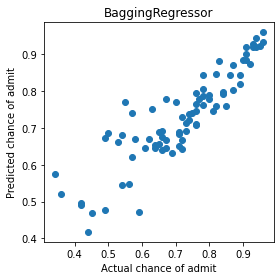

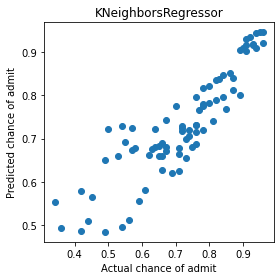

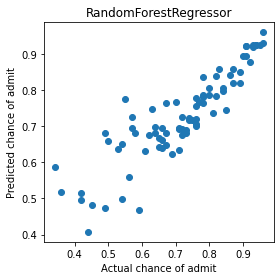

In [67]:
for model in models:
    print("=========================================")
    print("Обучение модели "+ type(model).__name__)
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    plt.figure(figsize=(4, 4))
    plt.scatter(y_test, predicted)
    plt.title(type(model).__name__)
    plt.xlabel('Actual chance of admit')
    plt.ylabel('Predicted chance of admit')
    plt.tight_layout()
    quality(y_test, predicted)

# Подбор гиперпараметров моделей

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate

### Подбор гиперпараметров для модели BaggingRegressor

In [69]:
param_grid = {
    'n_estimators' : [1, 3, 6, 9, 12, 15, 20, 25],
    'max_samples' : [0.05, 0.1, 0.2, 0.5],
    'max_features' : [1, 2, 3, 4]
}

bagging = BaggingRegressor()
grid = GridSearchCV(estimator=bagging, param_grid=param_grid)
grid.fit(X_train, y_train)
print(grid)

print(grid.best_score_)
print(grid.best_estimator_)

GridSearchCV(cv=None, error_score=nan,
             estimator=BaggingRegressor(base_estimator=None, bootstrap=True,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=1.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'max_features': [1, 2, 3, 4],
                         'max_samples': [0.05, 0.1, 0.2, 0.5],
                         'n_estimators': [1, 3, 6, 9, 12, 15, 20, 25]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.7542033810902766
BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=4, max_samples=0.2, n_estimators=25, n_jobs=None,


### Подбор параметров для KNeighborsRegressor

In [70]:
grid_params = {
    'n_neighbors': [3, 5, 11, 19],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(KNeighborsRegressor(), grid_params, verbose=1, cv=3, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid)

print(grid.best_score_)
print(grid.best_estimator_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 11, 19],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)
0.7596915153091609
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                    weights='distance')


[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    1.6s finished


### Подбор параметров для RandomForestRegressor

In [71]:
grid_params= {
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [3, 5, 9, 12, 15],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 4, 6]
}
grid = GridSearchCV(RandomForestRegressor(), grid_params, cv=2, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid)

print(grid.best_score_)
print(grid.best_estimator_)

GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

# Обучение с оптимальными значениями гиперпараметров

Обучение модели BaggingRegressor
  Метрики качества:
     Средняя квадратичная ошибка: 0.005366495358265308
     Средняя абсолютная ошибка: 0.05209932142857142
     Коэффициент детерминации: 0.7679597941507654
Обучение модели KNeighborsRegressor
  Метрики качества:
     Средняя квадратичная ошибка: 0.0048320105341591426
     Средняя абсолютная ошибка: 0.04812991183002667
     Коэффициент детерминации: 0.7910702154460847
Обучение модели RandomForestRegressor
  Метрики качества:
     Средняя квадратичная ошибка: 0.005418404381114956
     Средняя абсолютная ошибка: 0.05096098464628225
     Коэффициент детерминации: 0.7657153162292641


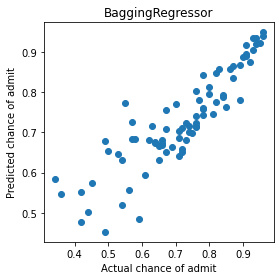

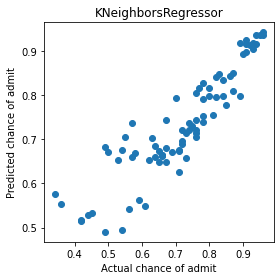

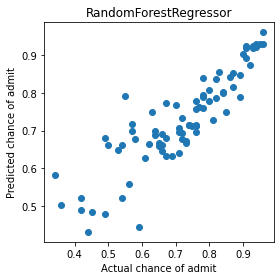

In [72]:
models = [BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=4, max_samples=0.5, n_estimators=25, n_jobs=None,
                 oob_score=False, random_state=None, verbose=0,
                 warm_start=False), 
          KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                    weights='distance'), 
          RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=9, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
         ]

for model in models:
    print("=========================================")
    print("Обучение модели "+type(model).__name__)
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    plt.figure(figsize=(4, 4))
    plt.scatter(y_test,predicted)
    plt.title(type(model).__name__)
    plt.xlabel('Actual chance of admit')
    plt.ylabel('Predicted chance of admit')
    plt.tight_layout()
    quality(y_test, predicted)

Лучшей оказалась модель случайного леса.
Оптимизация гиперпараметров не дала большого эффекта. 

Метрики качества показывают, что все модели, построенные в результате выполнения проекта, являются достаточно хорошими для их использования. При этом ансамблевые методы показали себя лучше классического алгоритма

# Выводы
В ходе выполнения проекта по анализу данных был выбран датасет для решения задачи регрессии.   
Были выбраны 3 модели, входящие в пакет sci-kit learn, и метрики качества, подходящие для регрессионного анализа.    
В ходе разведочного анализа были удалены отсутствующие значения, сильно коррелирующие между собой признаки.  
После проведенной оптимизации параметров моделей был сделан вывод о лучшей модели для данной задачи. Ею оказалась модель случайного леса.